# < Cohort Analysis >

<br>

### - Cohort 분석이란?
* 코호트 분석이란 시간의 흐름에 따른 growth와 retention을 측정하는 방법이다.
* 고객을 기준에 따라 Groupping한 뒤 시간에 따라 각 그룹 지표의 변화를 측정,비교한다.

<br>
    
### - Cohort를 나누는 기준
* `Time Cohort`
* Behaviort Cohort
* 3Size Cohort
    
* 대부분의 경우 Time Cohort를 본 문서에서도 시간에 따른 코호트 분석 방법으로 진행한다.

<br>
    
### - Time Cohort ?
* 제품이나 서비스를 사용한 시기에 따라 고객을 그룹화하는 방식.
* ex) 1월 가입, 2월 가입, 3월가입 ... or 1월 구매, 2월 구매, 3월 구매 등의 기준으로 그룹을 나누어 시간이 지남에 따라 각 그룹별 지표의 변화를 살펴보는 방식.

<br>
    
### - Data
* 본 문서에서 사용하는 데이터는 UCI에서 제공하는 온라인 소매 상점 거래기록 데이터임.
    - 데이터 출처 : http://archive.ics.uci.edu/ml/datasets/Online+Retail/
    - 데이터 정보 : 2010.12.01 ~ 2011.12.09까지의 online retail shop의 고객 거래 데이터. 주 고객층은 도매업임.
    - 컬럼 정보 :
        * InvoiceNo : 거래식별 번호. 'c'로 시작할 경우 해당 거래는 "취소" 거래를 나타냄.
        * StockCode : 상품 식별 번호.
        * Description : 상품 배송지.
        * Quantity : 상품의 주문 개수.
        * InvoiceDate : 거래 발생 날짜.
        * UnitPrice : 상품의 개당 가격.
        * CustomerID : 고객 식별 번호.
        * Country : 고객의 국가정보.
        
<br>

### - Cohort Analysis with Python
* 본 문서에서는 python을 사용하여 코호트 분석을 진행하며 각 기능별 모듈화를 통해 코드의 재사용성을 높임

<br>

### - 참고자료
* [`파이선 머신러닝 완벽 가이드`](https://book.naver.com/bookdb/book_detail.nhn?bid=16238302)
* [`첫걸음부터 실무까지 쉽게 배우는 데이터 분석`](https://taling.me/vod/play/849)

## < 라이브러리 Import & 데이터 Load >

In [1]:
## libarary import

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)

sns.set()
%matplotlib inline

## 한글설정
import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')

# save origin
df_ori = pd.read_excel(io='C:/Users/KIHyuk/Desktop/dacon_data/CRM/UCI_Online_Retail/Online Retail.xlsx')

df = df_ori.copy()
df

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## < EDA & 결측값 처리 >

<br>

CoustomerID에 대한 전처리 진행. 고객식별번호가 결측값인 경우 의미없는 데이터이므로 제거해줌.

In [2]:
print("Customer ID row개수 , 결측치 개수 : ",len(df['CustomerID']) ,df['CustomerID'].isnull().sum())
df = df[df['CustomerID'].notnull()] # Coustomer ID 결측치 삭제
print("결측치 제거 후 Customer ID row개수 : ", len(df['CustomerID']))
print("Unique Customer ID : ", df['CustomerID'].nunique())

Customer ID row개수 , 결측치 개수 :  541909 135080
결측치 제거 후 Customer ID row개수 :  406829
Unique Customer ID :  4372


<br>

고객의 국가정보를 시각화. 89%의 고객이 영국(UK)에 거주하는것으로 나타남. 분석의 용이를 위해 영국에 거주하는 고객만을 대상으로 분석을 진행.

전체 국가 수 :  37
전체 국가중 United Kingdom 비율 :  0.8895088599878573


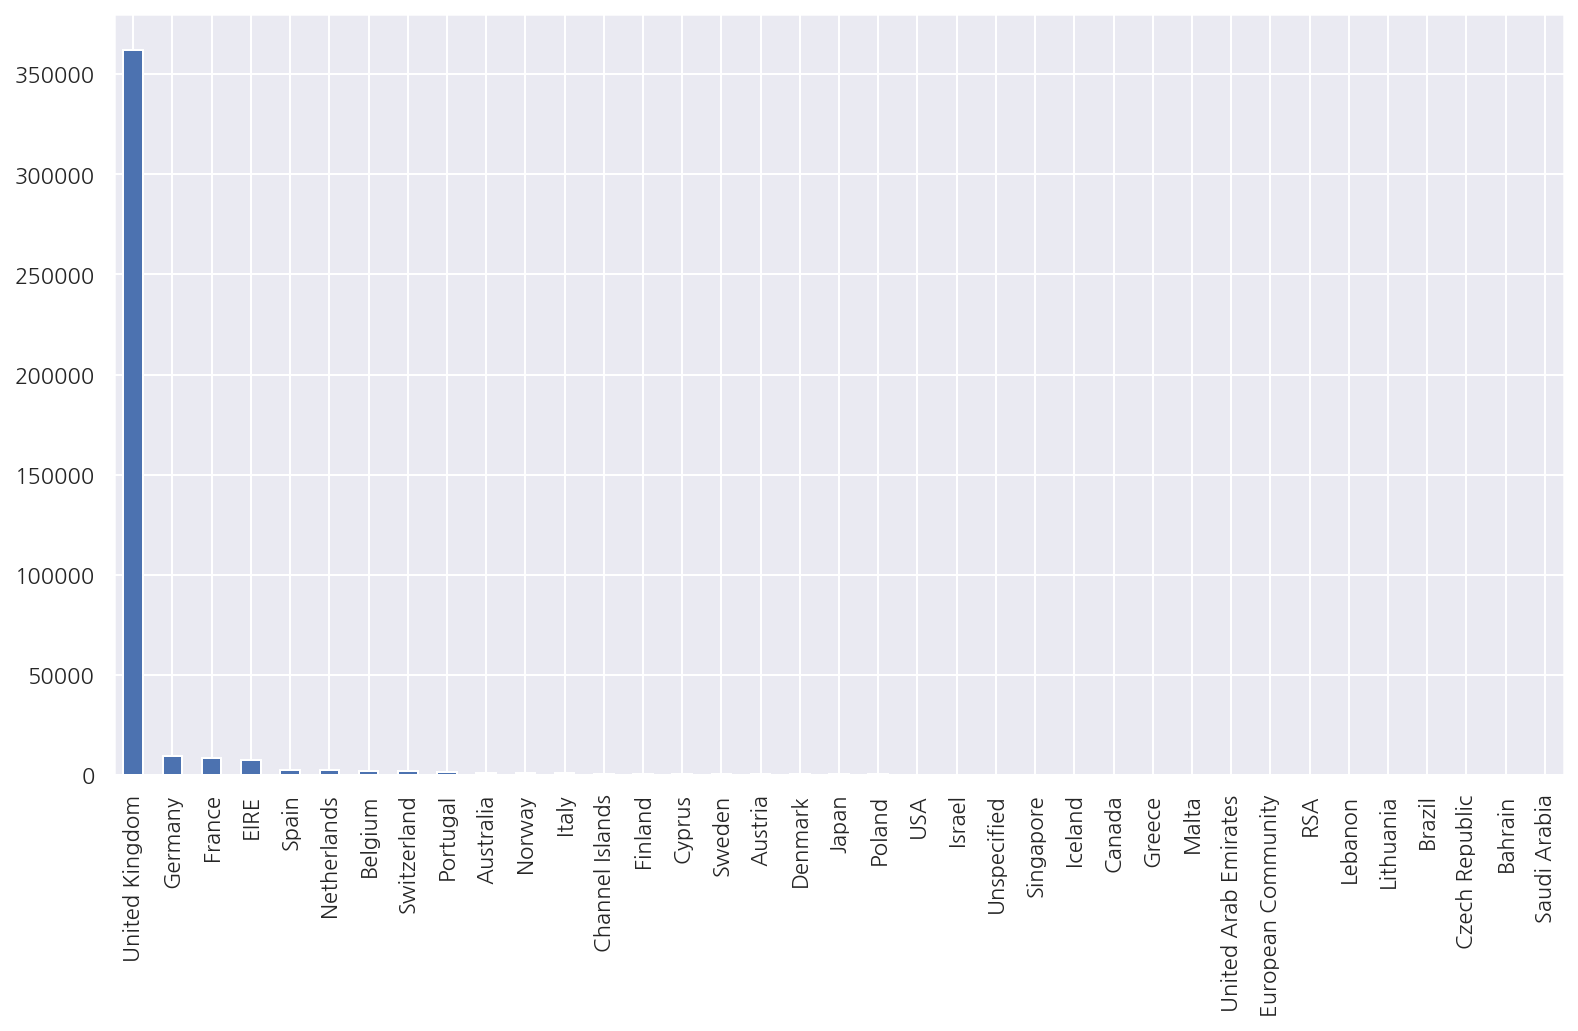

In [3]:
plt.figure(figsize=(13,7))
df['Country'].value_counts().plot(kind='bar')
print("전체 국가 수 : ", df['Country'].nunique())
print("전체 국가중 United Kingdom 비율 : ",len(df[df['Country']== 'United Kingdom'])/len(df))

# United Kingdom을 대상으로 진행
df = df[df['Country'] == 'United Kingdom']

<br>

상품 주문 개수와, 상품 가격이 -1인 경우가 존재함. 이는 거래취소,할인,환급인 경우로 추정되므로 제거해줌.

In [4]:
display(df['Quantity'].describe())
#  Quantity가 음수인 row 제외 
df = df[df['Quantity'] > 0]

print("#############################")

display(df.UnitPrice.describe())
#  Price가 음수인 row 제외 
df = df[df['UnitPrice'] > 0]

count    361878.000000
mean         11.077029
std         263.129266
min      -80995.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

#############################


count    354345.000000
mean          2.963793
std          17.862067
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

<br>

각 거래별 거래금액에 대한 정보 추가.

In [5]:
## 거래금액 col 추가
df['sale_amount'] = df['Quantity'] * df['UnitPrice']

<br>

데이터를 각 Cohort별로 Groupping
    1. 고객별 최초 구매일자를 구함.
    2. 각 거래별로(=row별로) 최초 거래일로부터의 기간을 구함.

In [6]:
# cohort 구하기
first_purchase = pd.DataFrame()

# 전체 고객수(Unique)
print("전체 고객수(중복제거) : ",df['CustomerID'].nunique())

# 1. 고객별 최초 구매일 구하기
first_purchase['CustomerID'] = df.groupby('CustomerID')['InvoiceDate'].min().index.astype('object')
first_purchase['최초 구매일'] = df.groupby('CustomerID')['InvoiceDate'].min().values
first_purchase['최초 구매일'] = first_purchase['최초 구매일'].dt.date # 날짜까지만 출력
display(first_purchase.head())

전체 고객수(중복제거) :  3920


,CustomerID,최초 구매일
0,12346,2011-01-18
1,12747,2010-12-05
2,12748,2010-12-01
3,12749,2011-05-10
4,12820,2011-01-17


In [7]:
# 최초구매일 데이터와 병합
df = pd.merge(df,first_purchase,how='left')
display(df[['CustomerID','최초 구매일']].head())

,CustomerID,최초 구매일
0,17850,2010-12-01
1,17850,2010-12-01
2,17850,2010-12-01
3,17850,2010-12-01
4,17850,2010-12-01


* `cohortIndex_daily`	- 해당 거래의 최초 거래일로부터의 기간(일)
* `cohortIndex_monthly` - 해당 거래의 최초 거래일로부터의 기간(월)

In [8]:
# 각 row별로 최초 구매일로부터 해당 결제까지의 기간을 구함
df['cohortIndex_daily'] = df['InvoiceDate'].dt.date - df['최초 구매일']

# 개월수 위한 함수
def get_monthly(df):
    start = df['최초 구매일']
    end = df['InvoiceDate']
    
    if start.year == end.year:
        result = end.month - start.month
        return result
    elif start.year < end.year:
        result = (end.month+12) - start.month
        return result

df['cohortIndex_monthly'] = df.apply(get_monthly,axis=1)
df['최초 구매일'] = pd.to_datetime(df['최초 구매일'])
display(df[['InvoiceDate','최초 구매일','cohortIndex_daily','cohortIndex_monthly']])

,InvoiceDate,최초 구매일,cohortIndex_daily,cohortIndex_monthly
0,2010-12-01 08:26:00,2010-12-01,0 days,0
1,2010-12-01 08:26:00,2010-12-01,0 days,0
2,2010-12-01 08:26:00,2010-12-01,0 days,0
3,2010-12-01 08:26:00,2010-12-01,0 days,0
4,2010-12-01 08:26:00,2010-12-01,0 days,0
...,...,...,...,...
354316,2011-12-09 12:31:00,2011-05-25,198 days,7
354317,2011-12-09 12:49:00,2010-12-08,366 days,12
354318,2011-12-09 12:49:00,2010-12-08,366 days,12
354319,2011-12-09 12:49:00,2010-12-08,366 days,12


In [9]:
# cohort groupping
# 구매월별 cohort grouppinga & 일별  cohort groupping
df['cohort_monthly_group'] = df['최초 구매일'].map(lambda x: x.strftime('%Y-%m'))
df['cohort_daily_group'] = df['최초 구매일'].map(lambda x: x.strftime('%Y-%m-%d'))
df[['최초 구매일','cohort_monthly_group','cohort_daily_group']].head()

,최초 구매일,cohort_monthly_group,cohort_daily_group
0,2010-12-01,2010-12,2010-12-01
1,2010-12-01,2010-12,2010-12-01
2,2010-12-01,2010-12,2010-12-01
3,2010-12-01,2010-12,2010-12-01
4,2010-12-01,2010-12,2010-12-01


<br>

각 코호트 그룹별, Cohort Index별 고객의 수를 구한다. (단, 같은 월에 중복결제한 경우는 제외한다.)

In [11]:
monthly_cohort_retention = df.groupby(['cohort_monthly_group','cohortIndex_monthly'])[['CustomerID']].nunique()
# 같은달 중복구매 여부는 무시한다.
monthly_cohort_retention

CustomerID
cohort_monthly_group cohortIndex_monthly            
2010-12              0                           815
                     1                           289
                     2                           263
                     3                           304
                     4                           293
...                                              ...
2011-10              1                            79
                     2                            36
2011-11              0                           297
                     1                            35
2011-12              0                            34

[91 rows x 1 columns]

<br>

최종 결과물로 pivot_table 형태로 변경하여 각 코호트별 시간에 따른 지표를 비교,분석한다.

In [12]:
# pivot 형식으로 변경
pivot_1 = monthly_cohort_retention.unstack()
pivot_1

CustomerID                                            \
cohortIndex_monthly          0      1      2      3      4      5      6    
cohort_monthly_group                                                        
2010-12                   815.0  289.0  263.0  304.0  293.0  323.0  291.0   
2011-01                   358.0   76.0   93.0   84.0  119.0   99.0   90.0   
2011-02                   340.0   64.0   66.0   97.0   98.0   86.0   87.0   
2011-03                   419.0   64.0  109.0   83.0   94.0   69.0  111.0   
2011-04                   277.0   58.0   56.0   60.0   56.0   61.0   61.0   
2011-05                   256.0   48.0   44.0   44.0   53.0   58.0   68.0   
2011-06                   214.0   38.0   31.0   51.0   51.0   69.0   21.0   
2011-07                   169.0   30.0   33.0   39.0   47.0   18.0    NaN   
2011-08                   141.0   32.0   32.0   34.0   17.0    NaN    NaN   
2011-09                   276.0   63.0   83.0   32.0    NaN    NaN    NaN   
2011-10                   324.0   79.0   36.0    NaN    NaN    NaN    NaN   
2011-11                   297.0   35.0    NaN    NaN    NaN    NaN    NaN   
2011-12                    34.0    NaN    NaN    NaN    NaN    NaN    NaN   

                                                                
cohortIndex_monthly      7      8      9      10     11     12  
cohort_monthly_group                                            
2010-12               278.0  289.0  325.0  299.0  405.0  218.0  
2011-01                87.0  108.0  117.0  127.0   43.0    NaN  
2011-02                96.0   90.0  104.0   25.0    NaN    NaN  
2011-03                96.0  119.0   38.0    NaN    NaN    NaN  
2011-04                73.0   20.0    NaN    NaN    NaN    NaN  
2011-05                23.0    NaN    NaN    NaN    NaN    NaN  
2011-06                 NaN    NaN    NaN    NaN    NaN    NaN  
2011-07                 NaN    NaN    NaN    NaN    NaN    NaN  
2011-08                 NaN    NaN    NaN    NaN    NaN    NaN  
2011-09                 NaN    NaN    NaN    NaN    NaN    NaN  
2011-10                 NaN    NaN    NaN    NaN    NaN    NaN  
2011-11                 NaN    NaN    NaN    NaN    NaN    NaN  
2011-12                 NaN    NaN    NaN    NaN    NaN    NaN

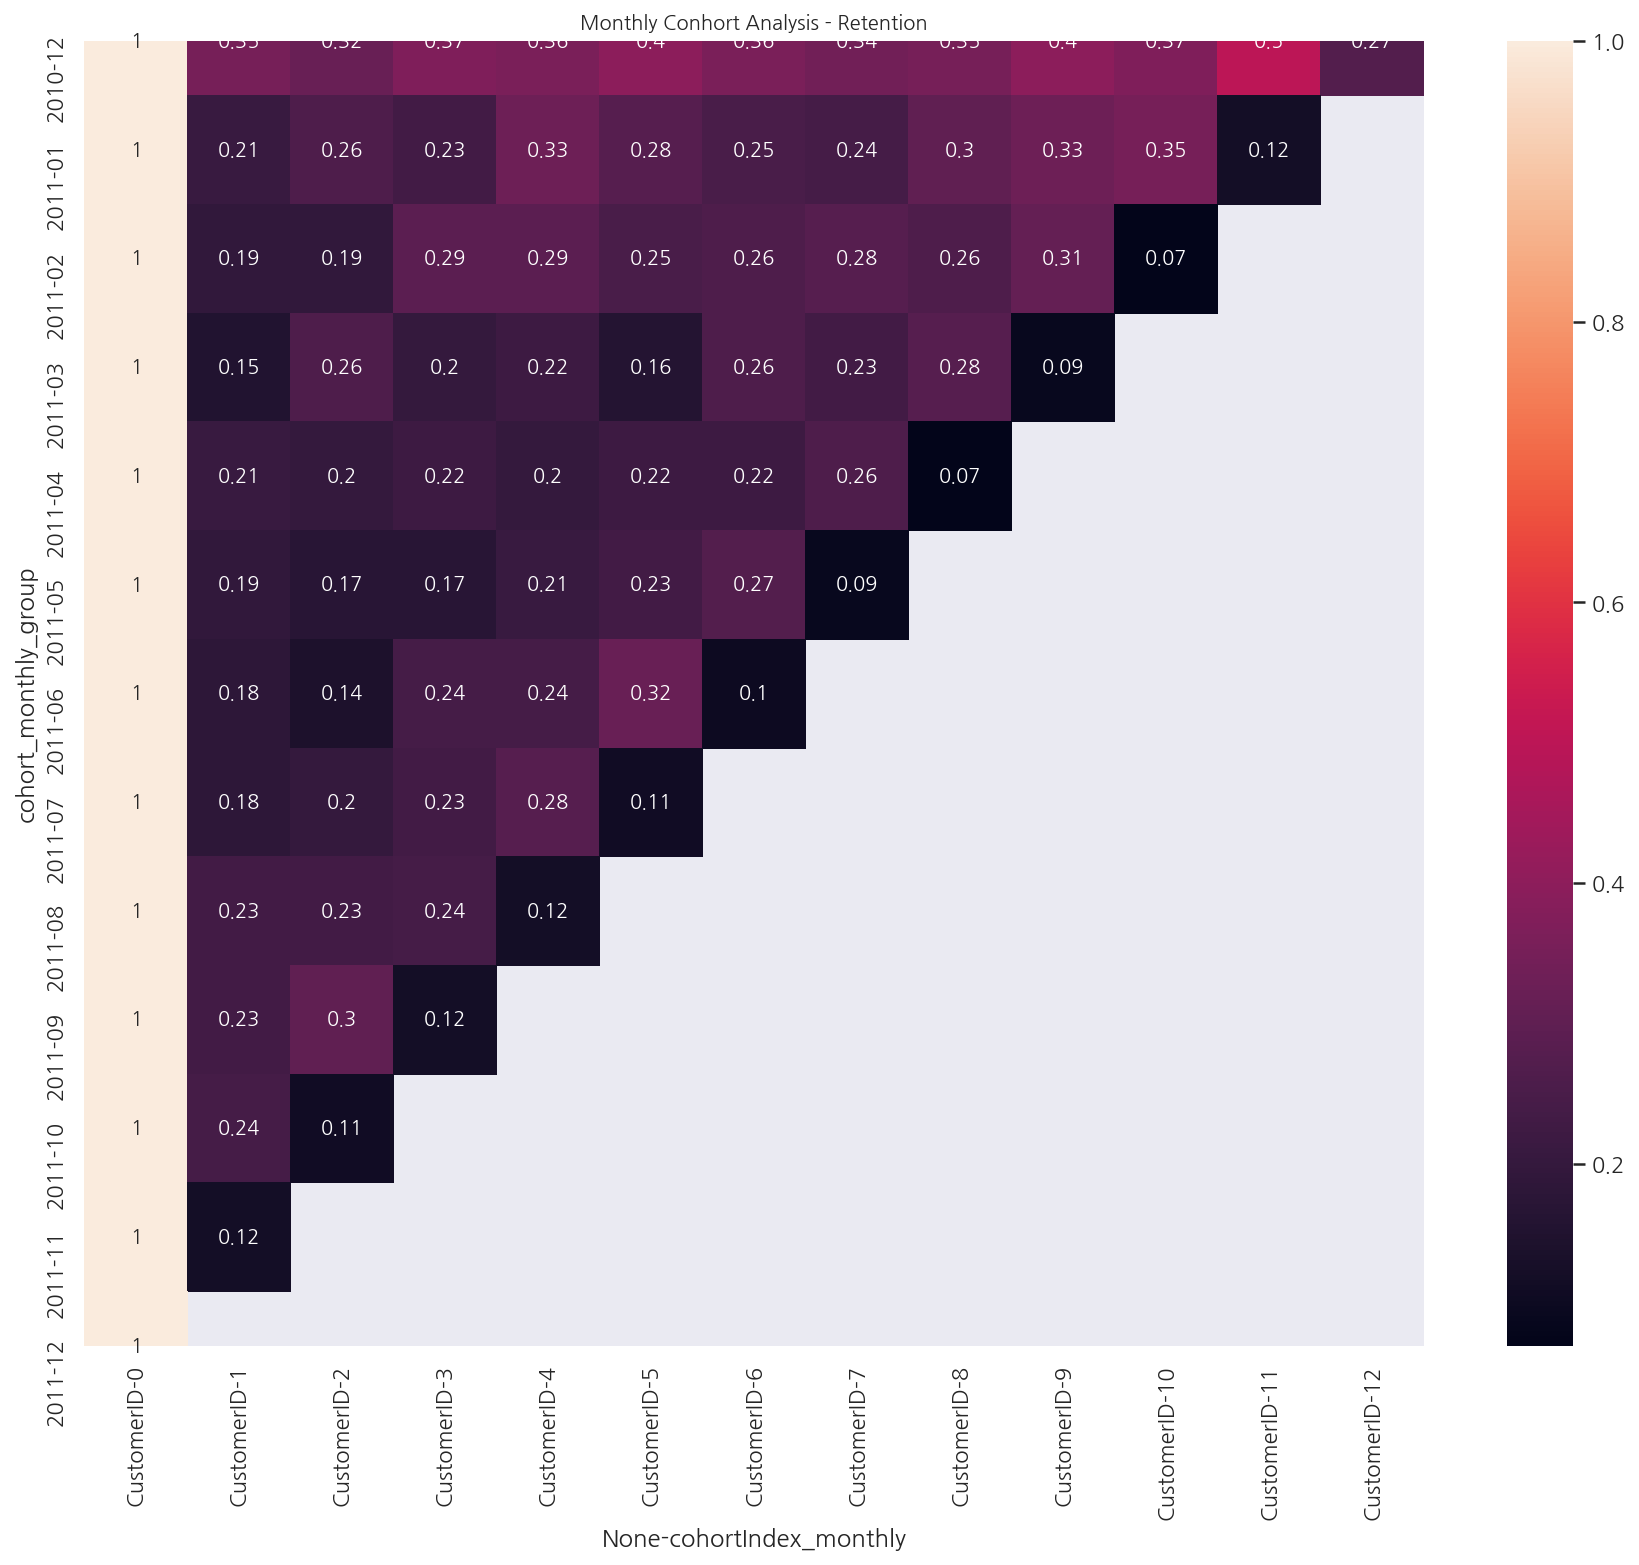

In [13]:
# pivot 테이블의 값을 retention 비율로 변경

for i in range(len(pivot_1)):
    pivot_1.iloc[i] = round(pivot_1.iloc[i] / pivot_1.iloc[i][0],2)

pivot_1

plt.figure(figsize=(15,12))
sns.heatmap(pivot_1, annot=True)
plt.title('Monthly Conhort Analysis - Retention', fontsize=10)
plt.show()